# 공지사항

## 1. 데이터 선정 이유 및 문제 정의 (1 Day)
- 해결하고자 하는 문제, 시나리오: 의료서비스 제공자의 의료보험 청구 사기 탐지
- 문제 해결의 필요성 (명확히 제시): <br>
-- '사기': 사실을 오인시키는 등의 방법으로 남을 기망, 무단으로 경제적 이득을 얻거나 다른 사람으로 하여금 얻게 하는 행위. 도덕적으로 큰 죄<br>
-- healthcare fraud, 의료보험 사기도 그 중 하나<br>
-- 미국 의료보험 체계에서, 의료서비스 제공자(의사, 간호사, 약사 등)는 환자의 진료 상세를 기록, 보험 가입자(환자)를 대신하여 보험금을 청구<br>
-- 의료보험 사기는 1) 제공되지 않은 의료 서비스를 청구하거나 2) 의료 서비스에 대해 중복 청구하거나 3) 제공된 의료서비스를 오기재하거나 4) 실제 제공된 내역보다 부풀려 보험금을 청구하거나 5) 의료보험 대상이 아닌 서비스에 대해 대상인 서비스로 청구하는 등의 식으로 나타남.<br>
-- 관계자: 의료서비스 제공자, (수술 시 집도의), 보험 가입자<br>

-- 이러한 사기 청구는 의료보험 총 지출의 상당 부분을 차지하며<br>
-- 보험사의 피해도 극심<br>
-- 연쇄적으로 보험 가입자가 지불하는 보험료 역시 지속적으로 인상 중<br>

-- 그렇기에, 본 프로젝트에서는 의료서비스 제공자의 보험금 청구가 '잠재적으로' 사기 행위일지 예측하고 상기 경제적 손실 방지를 도모하고자 함<br>
-- 경제적 손실 방지 뿐만 아니라 적법한 방식으로 불특정 다수가 필요할 때 이용할 수 있는 건강한 의료보험 체계 형성에 기여할 수 있음<br>

- 어떤 유형의 문제로 (분류/회귀) 접근할지: 특정 청구 건이 사기인지 아닌지 (0/1) 이진 분류
- 해결하고자 하는 문제 정의에 적절한 타겟 선정: 'PotentialFraud' (Yes/No)
- 타겟을 잘 설명할 수 있을 만한 특성에 대한 가설 설정: <br>
-- 1) 가입자의 연령(Age: D0D-D0B)<br>
-- 2) 가입자의 기저질환(ChronicCond_) 여부, 특정 질환(RenalDisease) 여부<br>
-- 3) 배상 보험금, 보험료<br>

상기 특성들이 보험 청구건이 사기로 예측될 확률에 영향을 줄 것이다. <br>

Q1. 내가 세운 가설이 문제 해결에 의미가 있나? <br>
Q2. 해당 특성을 target으로 지정한 이유? <br>

*그외 진행 시 유의사항<br>
-- FP(False Positive, 사기가 아닌데 사기로 분류)는 보험사의 신뢰도(명성)에 부정적 영향<br>
-- FN(False Negative, 실제 사기인데 정상 청구건으로 분류)는 보험사에 경제적 손실을 입히게 됨<br>



## 2. 데이터 전처리, EDA, 시각화 (1.5 Day)
- 머신러닝에 적합한 형태로 데이터타입 변경
- 결측치 처리 (여러가지 테크닉 사용)
- 본인의 전처리 과정에 대해 근거를 들어 설명
- 특성의 분포 확인, 이상치 제거
- 1.에서 세운 가설과 관련한 시각화 결과 제시

Q1. Data Leakage가 있나? 없다면 어떻게 방지했나? <br>
Q2. 특성-타겟의 관계 및 가설을 충분히 설명할 수 있는 시각화 결과 제시했나?

In [ ]:
# warning 제거를 위한 코드
import numpy as np
np.seterr(divide = 'ignore', invalid = 'ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

# Read all 4 train datasets (procured from Kaggle)

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename_in = '/content/Train_Inpatientdata-1542865627584.csv'
filename_out = '/content/Train_Outpatientdata-1542865627584.csv'
filename_bene = '/content/Train_Beneficiarydata-1542865627584.csv'
filename_pf = '/content/Train-1542865627584.csv'

In [ ]:
X_train_inpatient = pd.read_csv(filename_in)
X_train_outpatient = pd.read_csv(filename_out)
X_train_beneficiary = pd.read_csv(filename_bene)

# target = 'PotentialFraud'
y_train = pd.read_csv(filename_pf)

print('X_train_inpatient: ', X_train_inpatient.shape)
print('X_train_outpatient: ', X_train_outpatient.shape)
print('X_train_beneficiary: ', X_train_beneficiary.shape)
print('y_train: ', y_train.shape)

X_train_inpatient:  (40474, 30)
X_train_outpatient:  (517737, 27)
X_train_beneficiary:  (138556, 25)
y_train:  (5410, 2)


In [ ]:
# display all the columns in a dataframe
pd.set_option('display.max_columns', None)

In [ ]:
X_train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [ ]:
X_train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [ ]:
y_train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
X_train_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [ ]:
X_train_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [ ]:
X_train_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [ ]:
y_train['PotentialFraud'].value_counts() # 타겟 클래스 불균형

No     4904
Yes     506
Name: PotentialFraud, dtype: int64

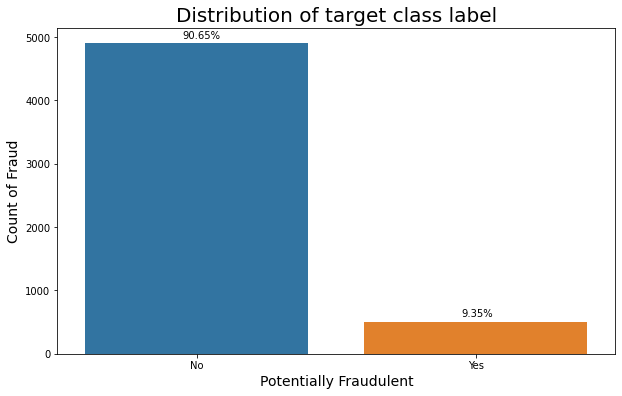

In [ ]:
# 타겟 클래스 분포 시각화 (No 90%, Yes 10%의 불균형)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'PotentialFraud', data = y_train)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Distribution of target class label', fontsize=20)
plt.xlabel('Potentially Fraudulent', size = 14)
plt.ylabel('Count of Fraud', size = 14)

for p in ax.patches:
        ax.annotate('{:.2f}%'.format(100 * p.get_height()/len(y_train)), (p.get_x()+0.35, p.get_height()+80))

# Pre-processing (before Merge, + Feature Engineering1)

In [ ]:
# ChronicCon_ 칼럼 (공통) 값 변경: 2 > 0 (없음) / 1: 만성적인 해당 질환 증상 있음
X_train_beneficiary = X_train_beneficiary.replace(
    {'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2, 
    'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
    'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
     'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 
     0
     )

# RenalDiseaseIndicator 칼럼(특정 신장질환 여부) 값 변경: Y > 1 (있음) / 0: 없음
X_train_beneficiary = X_train_beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [ ]:
# Patient_Risk_Score: ChronicCon_ 칼럼 값들의 합
# ChronicCon_ 칼럼 데이터타입 수치형으로 변경
X_train_beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = X_train_beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)
X_train_beneficiary['Patient_Risk_Score'] = X_train_beneficiary['ChronicCond_Alzheimer'] + X_train_beneficiary['ChronicCond_Heartfailure'] + \
                                        X_train_beneficiary['ChronicCond_KidneyDisease'] + X_train_beneficiary['ChronicCond_Cancer'] +\
                                        X_train_beneficiary['ChronicCond_ObstrPulmonary'] + X_train_beneficiary['ChronicCond_Depression'] +\
                                        X_train_beneficiary['ChronicCond_Diabetes'] + X_train_beneficiary['ChronicCond_IschemicHeart'] +\
                                        X_train_beneficiary['ChronicCond_Osteoporasis'] + X_train_beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                        X_train_beneficiary['ChronicCond_stroke'] + X_train_beneficiary['RenalDiseaseIndicator'] 

In [ ]:
#1. Patient_Age = (DOD - DOB)
X_train_beneficiary['DOB'] = pd.to_datetime(X_train_beneficiary['DOB'], format = '%Y-%m-%d')
X_train_beneficiary['DOD'] = pd.to_datetime(X_train_beneficiary['DOD'], format = '%Y-%m-%d')
patient_age1 = (X_train_beneficiary['DOD'] - X_train_beneficiary['DOB'])
X_train_beneficiary['Patient_Age'] = (patient_age1.dt.days)/365
X_train_beneficiary.Patient_Age.fillna((((pd.to_datetime('2009-12-01', format = '%Y-%m-%d') - X_train_beneficiary['DOB']).dt.days)/365), inplace = True)
# X_train_beneficiary['DOD'].sort_values(ascending = False): 2009-12-01

# df['datetime'] = df['datetime'].astype(str)

In [ ]:
X_train_beneficiary.Patient_Age

0         66.961644
1         73.298630
2         73.383562
3         87.479452
4         74.301370
            ...    
138551    70.468493
138552    71.049315
138553    93.564384
138554    79.969863
138555    57.706849
Name: Patient_Age, Length: 138556, dtype: float64

In [ ]:
round((X_train_beneficiary['Patient_Age']), 0)

0         67.0
1         73.0
2         73.0
3         87.0
4         74.0
          ... 
138551    70.0
138552    71.0
138553    94.0
138554    80.0
138555    58.0
Name: Patient_Age, Length: 138556, dtype: float64

In [ ]:
X_train_beneficiary['Patient_Age'] = round((X_train_beneficiary['Patient_Age']), 0)

In [ ]:
# 2. is_dead = DOD ~NaN (0: not dead, 1: dead) # int64
X_train_beneficiary['is_dead'] = 0
X_train_beneficiary.loc[X_train_beneficiary.DOD.notna(), 'is_dead'] = 1

In [ ]:
# 3. Duration_IP = DischargeDt - AdmissionDt
X_train_inpatient['DischargeDt'] = pd.to_datetime(X_train_inpatient['DischargeDt'], format = '%Y-%m-%d')
X_train_inpatient['AdmissionDt'] = pd.to_datetime(X_train_inpatient['AdmissionDt'], format = '%Y-%m-%d')
X_train_inpatient['Duration_IP'] = (X_train_inpatient['DischargeDt'] - X_train_inpatient['AdmissionDt']).dt.days + 1

# 4. Claim_Period = ClaimEndDt - ClaimStartDt
X_train_inpatient['ClaimEndDt'] = pd.to_datetime(X_train_inpatient['ClaimEndDt'], format = '%Y-%m-%d')
X_train_inpatient['ClaimStartDt'] = pd.to_datetime(X_train_inpatient['ClaimStartDt'], format = '%Y-%m-%d')
X_train_inpatient['Claim_Period'] = (X_train_inpatient['ClaimEndDt'] - X_train_inpatient['ClaimStartDt']).dt.days + 1

In [ ]:
# 5. Claimed_extra = (Claim_Period - Duration_IP) # 전부 int64
X_train_inpatient['Claimed_extra'] = X_train_inpatient['Claim_Period'] - X_train_inpatient['Duration_IP'] 

In [ ]:
#1-1). Patient_Age = (DOD - DOB)
X_train_beneficiary['DOB'] = X_train_beneficiary['DOB'].astype(str)
X_train_beneficiary['DOD'] = X_train_beneficiary['DOD'].astype(str)
X_train_beneficiary['Patient_Age'] = X_train_beneficiary['Patient_Age'].astype(str)

#3-1). Duration_IP = DischargeDt - AdmissionDt # Duration_IP: int64
X_train_inpatient['DischargeDt'] = X_train_inpatient['DischargeDt'].astype(str)
X_train_inpatient['AdmissionDt'] = X_train_inpatient['AdmissionDt'].astype(str)

#4-1). Claim_Period = ClaimEndDt - ClaimStartDt # Claim_Period: int64
X_train_inpatient['ClaimEndDt'] = X_train_inpatient['ClaimEndDt'].astype(str)
X_train_inpatient['ClaimStartDt'] = X_train_inpatient['ClaimStartDt'].astype(str)

In [ ]:
# Inpatient_or_Outpatient (Inpatient = 1 / Outpatient = 0)
X_train_inpatient['Inpatient_or_Outpatient'] = 1
X_train_outpatient['Inpatient_or_Outpatient'] = 0

# Merge all train datasets

In [ ]:
# X_train_inpatient + X_train_outpatient
cols_common1 = [idx for idx in X_train_inpatient.columns if idx in X_train_outpatient.columns] # print(cols_common1)
X_train_inout = pd.merge(X_train_inpatient, X_train_outpatient, left_on = cols_common1, right_on = cols_common1, how = 'outer')

In [ ]:
# X_train_inout + X_train_beneficiary
X_train_io_bene = pd.merge(X_train_inout, X_train_beneficiary, left_on = 'BeneID', right_on = 'BeneID', how = 'inner')

In [ ]:
# (Final) X_train_io_bene + y_train
X_train = pd.merge(X_train_io_bene, y_train, how = 'inner', on = 'Provider')

In [ ]:
print('X_train: ', X_train.shape) # X_train:  (558211, 62)

X_train:  (558211, 62)


In [ ]:
X_train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Duration_IP,Claim_Period,Claimed_extra,Inpatient_or_Outpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,is_dead,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.0,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,7,67.0,0,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,NaN,0.0,NaN,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,4,78.0,0,Yes


# Feature Engineering2

In [ ]:
# TotalReimbursementAmt = IPAnnualReimbursementAmt + OPAnnualReimbursementAmt (in merged X_train, X_test)
X_train['TotalReimbursementAmt'] = X_train['IPAnnualReimbursementAmt'] + X_train['OPAnnualReimbursementAmt']

# TotalAnnualDeductibleAmt = IPAnnualDeductibleAmt + OPAnnualDeductibleAmt (in merged X_train, X_test)
X_train['TotalAnnualDeductibleAmt'] = X_train['IPAnnualDeductibleAmt'] + X_train['OPAnnualDeductibleAmt']

In [ ]:
def fe_groupby(df, groupby_col, features, stat):
    for feature in features:
        per_gc_mean = 'Per' +''.join(groupby_col) + '_' + stat + '_' + feature
        df[per_gc_mean] = X_train.groupby(groupby_col)[feature].transform(stat)
    return df

In [ ]:
X_train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Duration_IP', 'Claim_Period', 'Claimed_extra',
       'Inpatient_or_Outpatient', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_C

In [ ]:
X_train.Patient_Age.dtypes
# 'Patient_Age', '', ''

dtype('O')

In [ ]:
# convert all 'features' column datatypes to numeric
# Patient_Age column needs to be converted (currently str(object))
X_train[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 
    'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 
    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 
    'Patient_Age', 'Duration_IP', 'Claim_Period', 
    'Patient_Risk_Score']] = X_train[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 
    'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 
    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 
    'Patient_Age', 'Duration_IP', 'Claim_Period', 
    'Patient_Risk_Score']].apply(pd.to_numeric)

In [ ]:
# (수치형 features 대상)
# 특정 변수(groupby_col) 당 평균 feature 신규 칼럼 생성

features = [
    'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 
    'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 
    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 
    'Patient_Age', 'Duration_IP', 'Claim_Period', 
    #'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 
    'Patient_Risk_Score']


X_train = fe_groupby(X_train, ['Provider'], features, 'mean') 

In [ ]:
# PerProvider_count_ClaimID: num of claims per provider
X_train = fe_groupby(X_train, ['Provider'], ['ClaimID'], 'count') 

In [ ]:
# 2개 이상 변수 영향 고려..? 고민 필요

In [ ]:
X_train.shape

(558211, 75)

In [ ]:
X_train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Duration_IP', 'Claim_Period', 'Claimed_extra',
       'Inpatient_or_Outpatient', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_C

In [ ]:
X_train.shape # (558211, 75) 가 되면 맞을듯.

(558211, 75)

# Pre-processing (after Merge) <br>
- Drop columns

In [ ]:
X_train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Duration_IP', 'Claim_Period', 'Claimed_extra',
       'Inpatient_or_Outpatient', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_C

In [ ]:
del_cols = [
    'BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt', 
    'AttendingPhysician','OperatingPhysician', 'OtherPhysician',
    'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 
    'ClmDiagnosisCode_4','ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 
    'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 
    'ClmDiagnosisCode_10',
    'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 
    'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 
    'ClmAdmitDiagnosisCode', 
    'AdmissionDt',
    #'ClaimStart_Year', 'ClaimStart_Month',
    #'ClaimEnd_Year', 'ClaimEnd_Month', 
    #'Admission_Year', 'Admission_Month', 
    #'Discharge_Year', 'Discharge_Month', 
    'DischargeDt', 
    'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
    'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
    'ChronicCond_Depression', 'ChronicCond_Diabetes',
    'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
    'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 
    'DOB', 'DOD', 
    #'Birth_Year', 'Birth_Month', 
    'State', 'County'
    ]
X_train_dropped = X_train.drop(columns = del_cols, axis=1)

In [ ]:
X_train_dropped.head(2)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,DiagnosisGroupCode,Duration_IP,Claim_Period,Claimed_extra,Inpatient_or_Outpatient,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,is_dead,PotentialFraud,TotalReimbursementAmt,TotalAnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_Duration_IP,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerProvider_count_ClaimID
0,PRV55912,26000,1068.0,201,7.0,7.0,0.0,1,1,1,0,12,12,1,36000,3204,60,70,7,67.0,0,Yes,36060,3274,7010.093458,599.158879,13279.626168,1391.663551,2329.626168,557.850467,76.093458,4.186916,4.186916,5.514019,107
1,PRV55912,50,0.0,0,0.0,0.0,0.0,0,1,1,0,12,12,1,24000,2136,450,200,4,78.0,0,Yes,24450,2336,7010.093458,599.158879,13279.626168,1391.663551,2329.626168,557.850467,76.093458,4.186916,4.186916,5.514019,107


## 결측치 제거 (0으로 처리)

In [ ]:
X_train.isnull().sum() 
# 다수의 결측치는 in+out merge의 결과 발생 (예. DischargeDt)
# 해당 결측치는 해당없음(0)으로 처리해주기로 함

BeneID                   0
ClaimID                  0
ClaimStartDt             0
ClaimEndDt               0
Provider                 0
                        ..
OPAnnualDeductibleAmt    0
Patient_Risk_Score       0
Patient_Age              0
is_dead                  0
PotentialFraud           0
Length: 62, dtype: int64

In [ ]:
# find the columns which contain null values
X_train.columns[X_train.isnull().any()].tolist()

['AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'Duration_IP',
 'Claim_Period',
 'Claimed_extra']

In [ ]:
X_train = X_train.fillna(0).copy()

In [ ]:
X_train.isna().sum().sum() # 모든 컬럼에 대한 결측치 개수의 합: 0 확인

0

# EDA

## Gender 분포

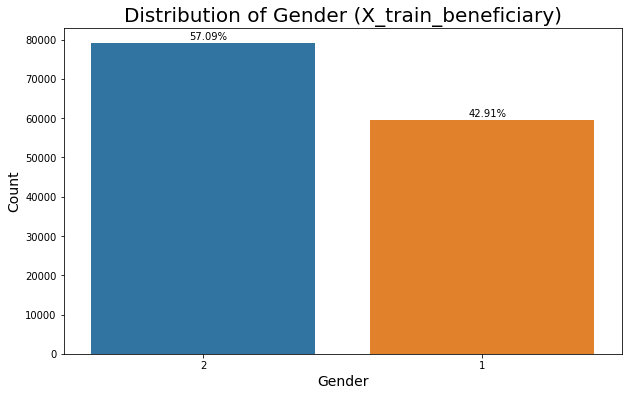

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'Gender', data = X_train_beneficiary, order = X_train_beneficiary['Gender'].value_counts().index)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Distribution of Gender (X_train_beneficiary)', fontsize=20)
plt.xlabel('Gender', size = 14)
plt.ylabel('Count', size = 14)

for p in ax.patches:
        ax.annotate('{:.2f}%'.format(100 * p.get_height()/len(X_train_beneficiary['Gender'])), (p.get_x()+0.35, p.get_height()+1000))

In [ ]:
# display all the columns in a dataframe
pd.set_option('display.max_columns', None)

In [ ]:
X_train_beneficiary.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,is_dead
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,7,67.0,0
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,0,73.0,0


## Gender 분포

In [ ]:
X_train_beneficiary.Gender.value_counts(normalize = True)

2    0.570932
1    0.429068
Name: Gender, dtype: float64

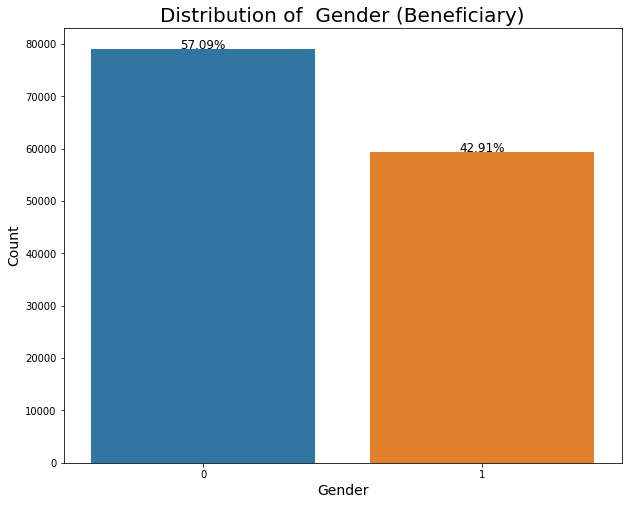

In [ ]:
# Replacing '2' with '0' for Gender Type
X_train_beneficiary = X_train_beneficiary.replace({'Gender': 2}, 0)
# X_train_beneficiary = X_train_beneficiary.replace({'Race': 2}, 0)

plt.figure(figsize=(10,8))

ax = sns.countplot(x='Gender',data=X_train_beneficiary, order = X_train_beneficiary['Gender'].value_counts().index)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Distribution of  Gender (Beneficiary)', fontsize=20)
plt.xlabel('Gender', size = 14)
plt.ylabel('Count', size = 14)

# countplot에 값 표시
for p in ax.patches:
    # height = p.get_height()
    total = len(X_train_beneficiary)
    percent = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percent, (x, y), ha = 'center', size = 12)
    # 참고. https://velog.io/@songjeongwoo/Seaborn%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%8B%9C%EA%B0%81%ED%99%94

## Patient Risk Score 분포

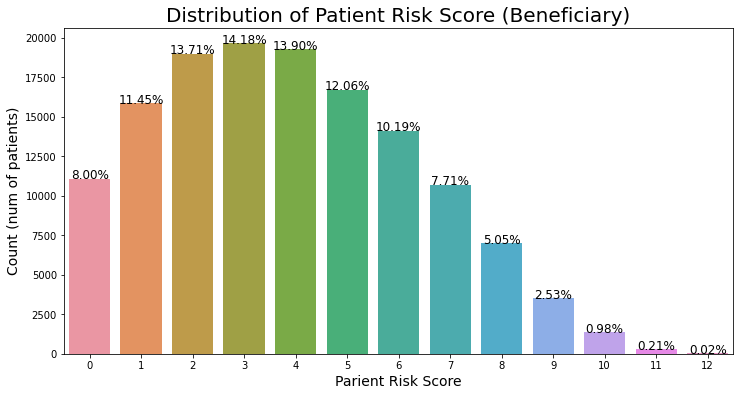

In [ ]:
# Distribition of patient risk score
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Patient_Risk_Score',y=None, data=X_train_beneficiary, orient ="v")
plt.title('Distribution of Patient Risk Score (Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Parient Risk Score', size = 14)
plt.ylabel('Count (num of patients)', size = 14)

# countplot에 값 표시
for p in ax.patches:
    # height = p.get_height()
    total = len(X_train_beneficiary)
    percent = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percent, (x, y), ha = 'center', size = 12)
    # 참고. https://velog.io/@songjeongwoo/Seaborn%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%8B%9C%EA%B0%81%ED%99%94

## Race countplot

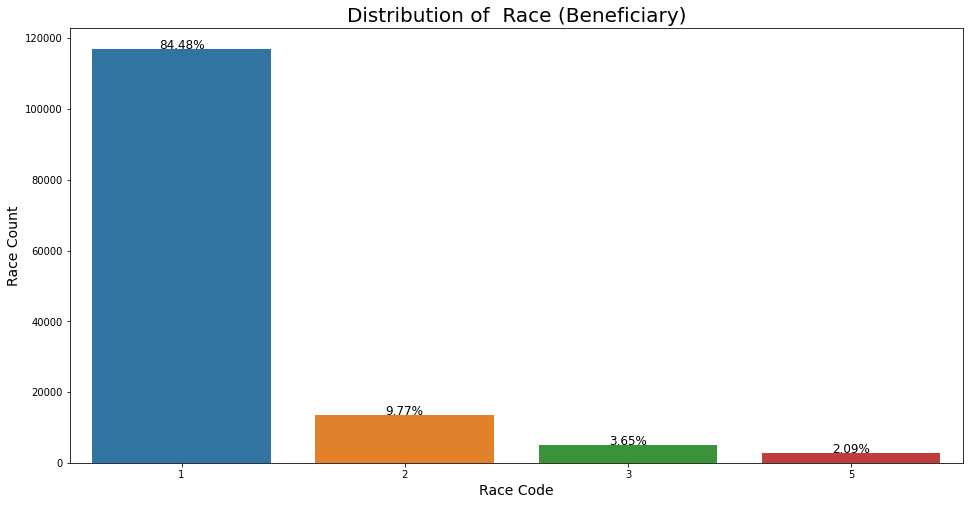

In [ ]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Race',y=None, data=X_train_beneficiary, orient ="v", order = X_train_beneficiary['Race'].value_counts().index)
plt.title('Distribution of  Race (Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race Code', size = 14)
plt.ylabel('Race Count', size = 14)

# countplot에 값 표시
for p in ax.patches:
    # height = p.get_height()
    total = len(X_train_beneficiary)
    percent = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percent, (x, y), ha = 'center', size = 12)
    # 참고. https://velog.io/@songjeongwoo/Seaborn%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%8B%9C%EA%B0%81%ED%99%94

## Age 분포



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


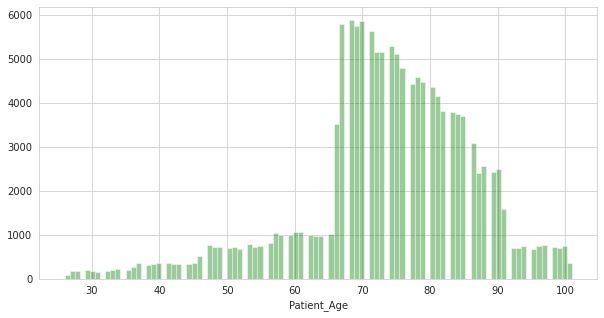

In [ ]:
# Plot distribution of age
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(X_train_beneficiary['Patient_Age'], kde = False, color ='green', bins = 100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


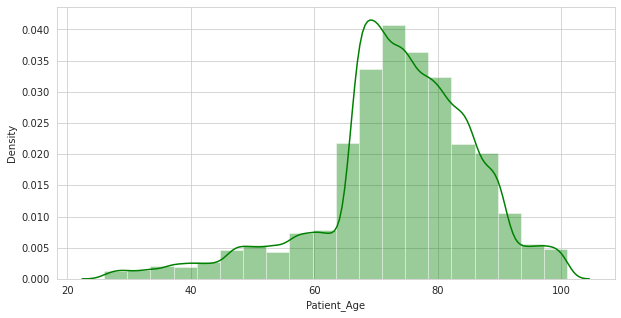

In [ ]:
# Plot distribution of age
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.distplot(X_train_beneficiary['Patient_Age'], kde = True, color ='green', bins = 20)
plt.show()

## 상위 20개 생년(Birth_Year) 분포

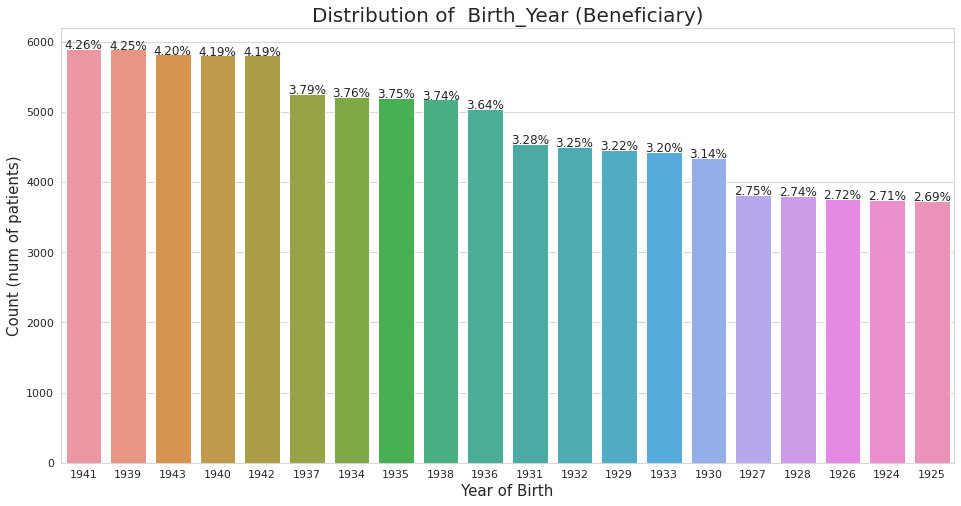

In [ ]:
X_train_beneficiary['DOB'] = pd.to_datetime(X_train_beneficiary['DOB'] , format = '%Y-%m-%d')
X_train_beneficiary['Birth_Year'] = X_train_beneficiary['DOB'].dt.year

plt.figure(figsize=(16, 8))
top20_birthyear = X_train_beneficiary['Birth_Year'].value_counts().iloc[:20].index
ax = sns.countplot(x='Birth_Year',y=None, data=X_train_beneficiary, orient ="v", order = top20_birthyear)
plt.title('Distribution of  Birth_Year (Beneficiary)', fontsize=20)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.xlabel('Year of Birth', size = 15)
plt.ylabel('Count (num of patients)', size = 15)

# countplot에 값 표시
for p in ax.patches:
    # height = p.get_height()
    total = len(X_train_beneficiary)
    percent = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percent, (x, y), ha = 'center', size = 12)
    # 참고. https://velog.io/@songjeongwoo/Seaborn%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%8B%9C%EA%B0%81%ED%99%94

## Boxplot - 보험금 (2) + 보험료 (2)

### IPAnnualDeductibleAmt

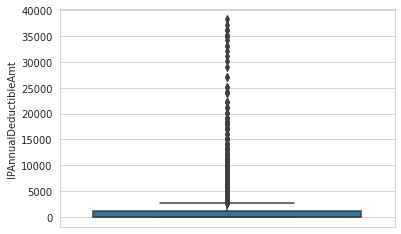

In [ ]:
# Plot boxplot of IPAnnualDeductibleAmt
sns.boxplot(y='IPAnnualDeductibleAmt', data=X_train_beneficiary)
plt.show()

In [ ]:
X_train_beneficiary.IPAnnualDeductibleAmt.sum()

55401242

In [ ]:
X_train_beneficiary.IPAnnualDeductibleAmt.describe()

count    138556.000000
mean        399.847296
std         956.175202
min           0.000000
25%           0.000000
50%           0.000000
75%        1068.000000
max       38272.000000
Name: IPAnnualDeductibleAmt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


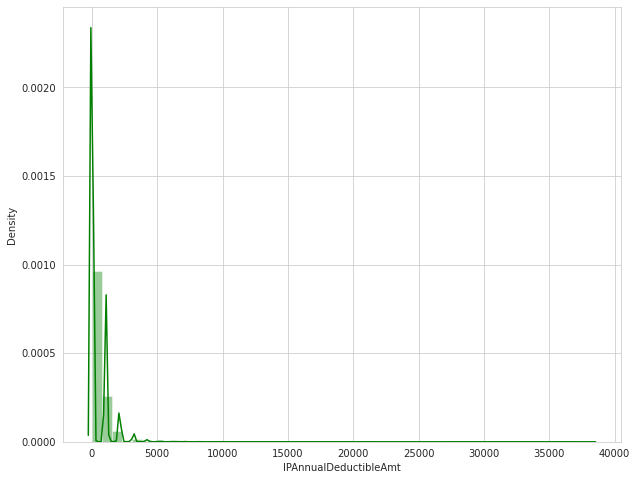

In [ ]:
# 시각화
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 8))
sns.distplot(X_train_beneficiary['IPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)
plt.show()

### IPAnnualReimbursementAmt

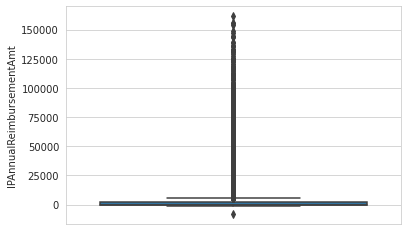

In [ ]:
sns.boxplot(y='IPAnnualReimbursementAmt', data=X_train_beneficiary)
plt.show()

In [ ]:
X_train_beneficiary.IPAnnualReimbursementAmt.describe()

count    138556.000000
mean       3660.346502
std        9568.621827
min       -8000.000000
25%           0.000000
50%           0.000000
75%        2280.000000
max      161470.000000
Name: IPAnnualReimbursementAmt, dtype: float64

In [ ]:
X_train_beneficiary.IPAnnualReimbursementAmt.sum()

507162970

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


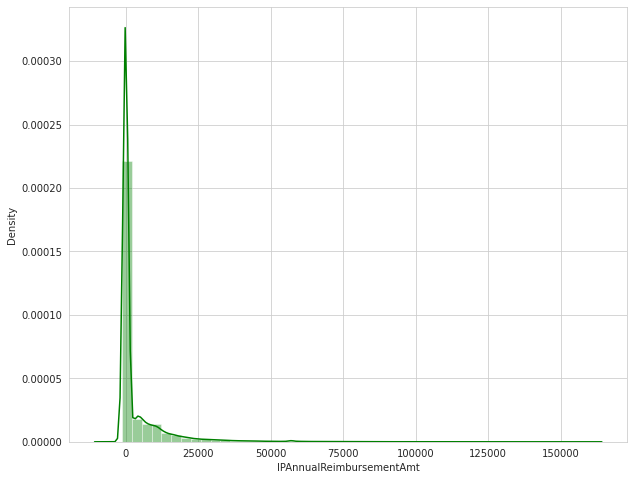

In [ ]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 8))
sns.distplot(X_train_beneficiary['IPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.show()

### OPAnnualDeductibleAmt

In [ ]:
X_train_beneficiary.OPAnnualDeductibleAmt.sum()

52335131

In [ ]:
X_train_beneficiary.OPAnnualDeductibleAmt.describe()

count    138556.000000
mean        377.718258
std         645.530187
min           0.000000
25%          40.000000
50%         170.000000
75%         460.000000
max       13840.000000
Name: OPAnnualDeductibleAmt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


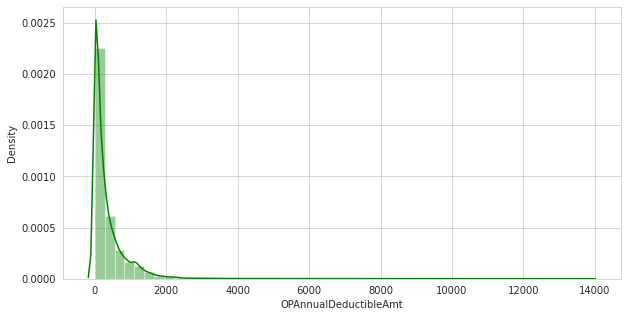

In [ ]:
# Plot distribution of OPAnnualDeductibleAmt
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(X_train_beneficiary['OPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)
plt.show()

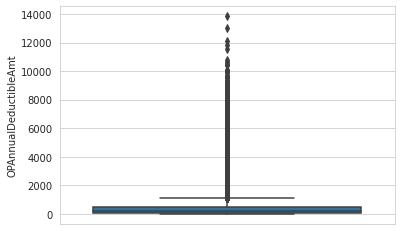

In [ ]:
# plot boxplot for OPAnnualDeductibleAmt
sns.boxplot(y='OPAnnualDeductibleAmt', data=X_train_beneficiary)
plt.show()

### OPAnnualReimbursement

In [ ]:
X_train_beneficiary.OPAnnualReimbursementAmt.sum()

179876080

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


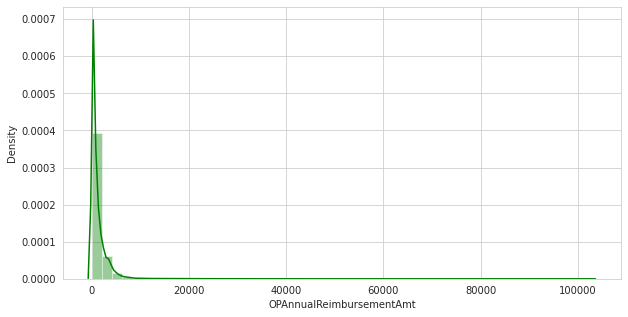

In [ ]:
# Plot distribution of OPAnnualReimbursementAmt
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(X_train_beneficiary['OPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.show()

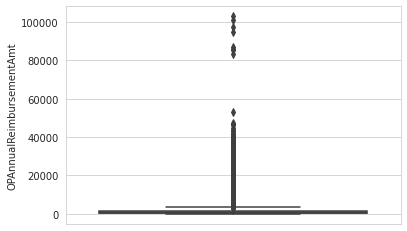

In [ ]:
# plot boxplot for OPAnnualReimbursementAmt
sns.boxplot(y='OPAnnualReimbursementAmt', data=X_train_beneficiary)
plt.show()

In [ ]:
X_train_beneficiary.OPAnnualReimbursementAmt.describe()

count    138556.000000
mean       1298.219348
std        2493.901134
min         -70.000000
25%         170.000000
50%         570.000000
75%        1500.000000
max      102960.000000
Name: OPAnnualReimbursementAmt, dtype: float64

## Scatterplot - 납부보험금 vs. 최대 배상 보험금

### IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt

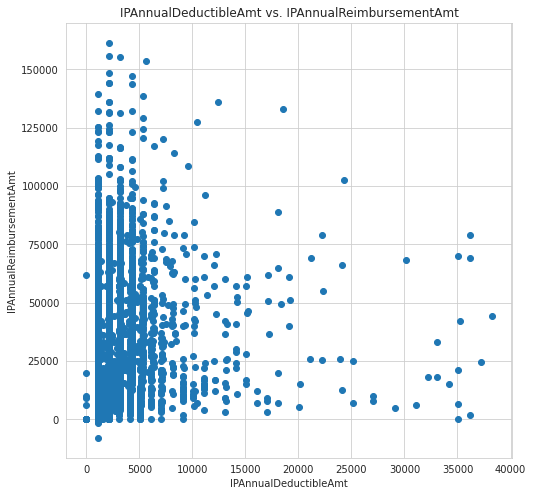

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train_beneficiary.IPAnnualDeductibleAmt, X_train_beneficiary.IPAnnualReimbursementAmt)
plt.xlabel('IPAnnualDeductibleAmt')
plt.ylabel('IPAnnualReimbursementAmt')
plt.title('IPAnnualDeductibleAmt vs. IPAnnualReimbursementAmt')
plt.show()

In [ ]:
X_train_beneficiary.IPAnnualDeductibleAmt.describe()

count    138556.000000
mean        399.847296
std         956.175202
min           0.000000
25%           0.000000
50%           0.000000
75%        1068.000000
max       38272.000000
Name: IPAnnualDeductibleAmt, dtype: float64

In [ ]:
X_train_beneficiary.IPAnnualReimbursementAmt.describe()

count    138556.000000
mean       3660.346502
std        9568.621827
min       -8000.000000
25%           0.000000
50%           0.000000
75%        2280.000000
max      161470.000000
Name: IPAnnualReimbursementAmt, dtype: float64

### OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt

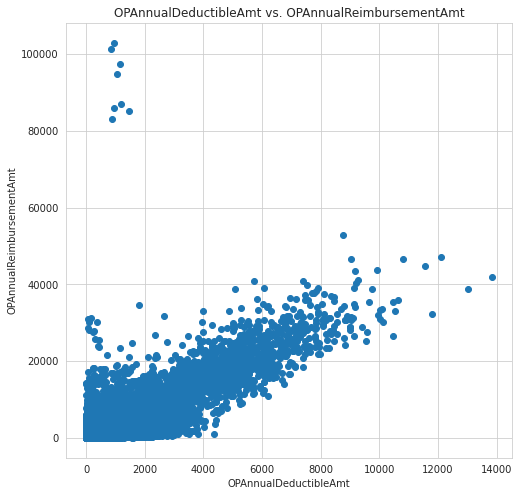

In [ ]:
# Plot Scatterplot OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt
plt.figure(figsize=(8, 8))
plt.scatter(X_train_beneficiary.OPAnnualDeductibleAmt, X_train_beneficiary.OPAnnualReimbursementAmt)
plt.xlabel('OPAnnualDeductibleAmt')
plt.ylabel('OPAnnualReimbursementAmt')
plt.title('OPAnnualDeductibleAmt vs. OPAnnualReimbursementAmt')
plt.show()

In [ ]:
X_train_beneficiary.OPAnnualDeductibleAmt.describe()

count    138556.000000
mean        377.718258
std         645.530187
min           0.000000
25%          40.000000
50%         170.000000
75%         460.000000
max       13840.000000
Name: OPAnnualDeductibleAmt, dtype: float64

In [ ]:
X_train_beneficiary.OPAnnualReimbursementAmt.describe()

count    138556.000000
mean       1298.219348
std        2493.901134
min         -70.000000
25%         170.000000
50%         570.000000
75%        1500.000000
max      102960.000000
Name: OPAnnualReimbursementAmt, dtype: float64

## InscClaimAmtReimbursed 분포

In [ ]:
X_train_inpatient['InscClaimAmtReimbursed'].notna().sum()

40474

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


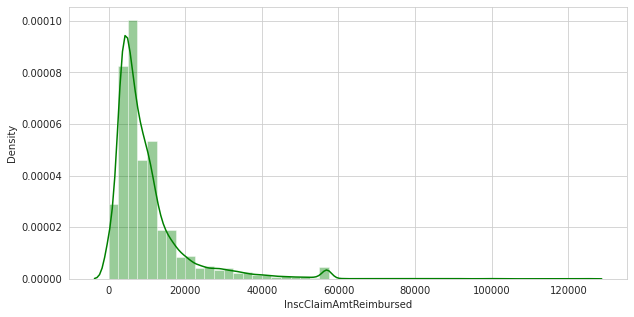

In [ ]:
# Plot the distribution for InscClaimAmtReimbursed
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(X_train_inpatient['InscClaimAmtReimbursed'], kde = True, color ='green', bins = 50)
plt.show()

## DeductibleAmtPaid 분포


In [ ]:
# total InscClaimAmtReimbursed for inpatient
X_train_inpatient['DeductibleAmtPaid'].notna().sum()

39575

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


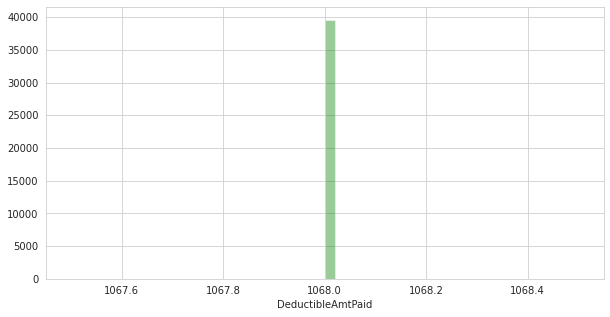

In [ ]:
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(X_train_inpatient['DeductibleAmtPaid'].dropna(), kde = False, color ='green', bins = 50)
plt.show()

## 입원환자 총 배상액

In [ ]:
idx_in = X_train['Inpatient_or_Outpatient'] == 1
Total_claims_in = X_train['InscClaimAmtReimbursed'][idx_in].count() # 40474
Amt_in_fraud = X_train['InscClaimAmtReimbursed'][(idx_in & (X_train['PotentialFraud'] == 'Yes'))].sum()
Amt_in = X_train['InscClaimAmtReimbursed'][idx_in].sum()
print("1. Total Amount Reimbursed (Inpatient): ", Amt_in)
print("2. Amount Spent in Fraud (Inpatient): ", Amt_in_fraud)
print("3. Average Reimbursed Amount per claim (Inpatient): ", round(Amt_in/Total_claims_in))
print("4. % spent in Fraud (Inpatient) = {:.2f}%".format(Amt_in_fraud/Amt_in * 100))

1. Total Amount Reimbursed (Inpatient):  408297020
2. Amount Spent in Fraud (Inpatient):  241288510
3. Average Reimbursed Amount per claim (Inpatient):  10088
4. % spent in Fraud (Inpatient) = 59.10%


## 외래환자 총 배상액

In [ ]:
idx_out = X_train['Inpatient_or_Outpatient'] == 0
Total_claims_out = X_train['InscClaimAmtReimbursed'][idx_out].count()
Amt_out_fraud = X_train['InscClaimAmtReimbursed'][(idx_out & (X_train['PotentialFraud'] == 'Yes'))].sum()
Amt_out = X_train['InscClaimAmtReimbursed'][idx_out].sum() # 
print("1. Total Amount Reimbursed (Inpatient): ", Amt_out)
print("2. Amount Spent in Fraud (Inpatient): ", Amt_out_fraud)
print("3. Average Reimbursed Amount per claim (Inpatient): ", round(Amt_out/Total_claims_out))
print("4. % spent in Fraud (Inpatient) = {:.2f}%".format(Amt_out_fraud/Amt_out * 100))

1. Total Amount Reimbursed (Inpatient):  148246120
2. Amount Spent in Fraud (Inpatient):  54392610
3. Average Reimbursed Amount per claim (Inpatient):  286
4. % spent in Fraud (Inpatient) = 36.69%


## (입원+외래) 총 배상액

In [ ]:
Total_Amt = X_train['InscClaimAmtReimbursed'].sum()
Total_Amt_fraud = X_train['InscClaimAmtReimbursed'][X_train['PotentialFraud'] == 'Yes'].sum()
print("1. Total Amount Reimbursed (Inpatient + Outpatient): ", Total_Amt)
print("2. Total Amount spent in Fraud (Inpatient + Outpatient): ", Total_Amt_fraud)
print("3. % spent in Fraud (Inpatient + Outpatient) = {:.2f}%".format(Total_Amt_fraud / Total_Amt * 100))

1. Total Amount Reimbursed (Inpatient + Outpatient):  556543140
2. Total Amount spent in Fraud (Inpatient + Outpatient):  295681120
3. % spent in Fraud (Inpatient + Outpatient) = 53.13%


## pairplot (피처-피처 상관관계)

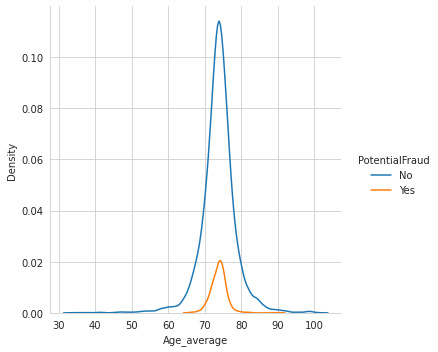

In [ ]:
filename_train1 = '/content/train1.csv'
df = pd.read_csv(filename_train1)

sns.displot(x = 'Age_average', hue = 'PotentialFraud', kind = 'kde', data = df)

(-2000.0, 4000.0)

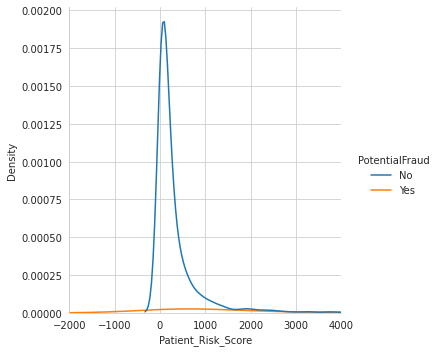

In [ ]:
sns.displot(x = 'Patient_Risk_Score', hue = 'PotentialFraud', kind = 'kde', data = df)
plt.xlim(-2000, 4000)

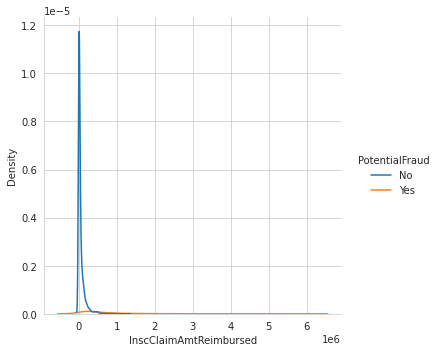

In [ ]:
sns.displot(x = 'InscClaimAmtReimbursed', hue = 'PotentialFraud', kind = 'kde', data = df)

In [ ]:
df.head()

,Unnamed: 0,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Duration_IP,Claim_Period,Claimed_extra,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,is_dead,TotalReimbursementAmt,TotalAnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_Duration_IP,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerProvider_count_ClaimID,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5,PerProvider_count_Claims,Age_average
0,0,PRV51001,No,104640,5340.0,30.0,30.0,0.0,5,8,300,300,15,440150,22428,65380,11598,147,0,505530,34026,104640.0,5340.0,440150.0,22428.0,65380.0,11598.0,1971.0,30.0,30.0,147.0,625,9.0,16.0,21.0,4.0,0.0,0.0,25,79.0
1,1,PRV51003,Yes,605670,66286.0,382.0,382.0,0.0,62,29,1560,1567,56,999000,122948,353520,97300,629,1,1352520,220248,605670.0,66286.0,999000.0,122948.0,353520.0,97300.0,9243.0,382.0,382.0,629.0,17424,54.0,78.0,107.0,24.0,0.0,1.0,132,70.0
2,2,PRV51004,No,52170,310.0,0.0,0.0,0.0,0,23,1768,1782,64,648430,64808,327040,92790,670,1,975470,157598,52170.0,310.0,648430.0,64808.0,327040.0,92790.0,10752.0,0.0,0.0,670.0,22201,46.0,103.0,120.0,24.0,5.0,0.0,149,72.0
3,3,PRV51005,Yes,280910,3700.0,0.0,0.0,0.0,0,259,13872,13910,426,4221950,441724,2457840,741323,5310,4,6679790,1183047,280910.0,3700.0,4221950.0,441724.0,2457840.0,741323.0,82104.0,0.0,0.0,5310.0,1357225,511.0,654.0,893.0,262.0,10.0,0.0,1165,70.0
4,4,PRV51007,No,33710,3264.0,19.0,19.0,0.0,3,11,852,852,26,219600,32040,124540,33820,311,1,344140,65860,33710.0,3264.0,219600.0,32040.0,124540.0,33820.0,4989.0,19.0,19.0,311.0,5184,34.0,38.0,58.0,14.0,0.0,0.0,72,69.0


In [ ]:
# cols2 = ['Gender_1', 'Gender_1', 'Race_1', 'Race_2', 'Race_3', 'Race_5', 'PotentialFraud']
# df3 = df.loc[:,cols2] # df3.head()
# sns.pairplot(df3, hue = 'PotentialFraud', diag_kind = 'kde') # diag_kind = 'kde': 대각 방향 밀도함수 지정
# plt.show()

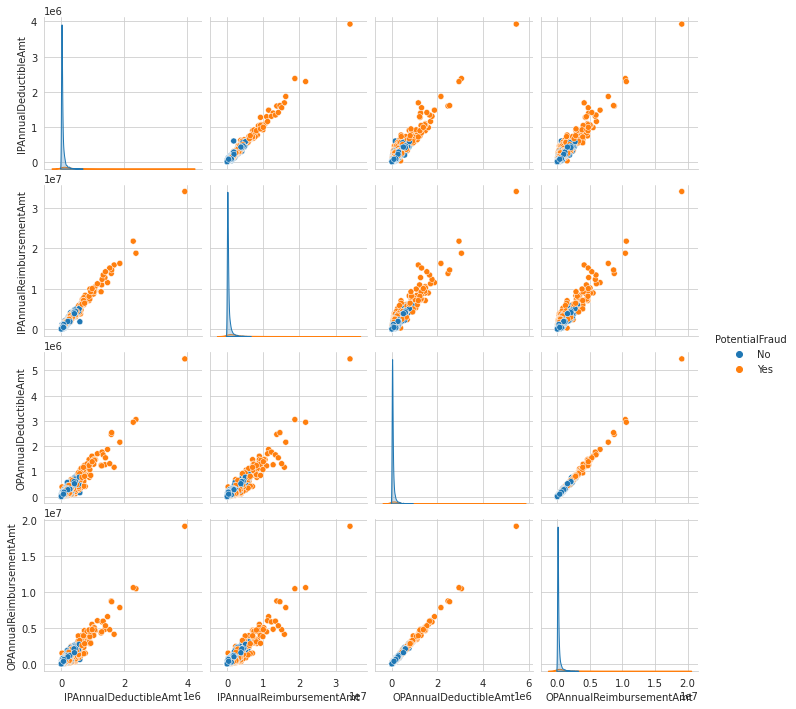

In [ ]:
cols2 = ['IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'PotentialFraud']
df2 = df.loc[:,cols2]
sns.pairplot(df2, hue = 'PotentialFraud', diag_kind = 'kde') # diag_kind = 'kde': 대각 방향 밀도함수 지정
plt.show()

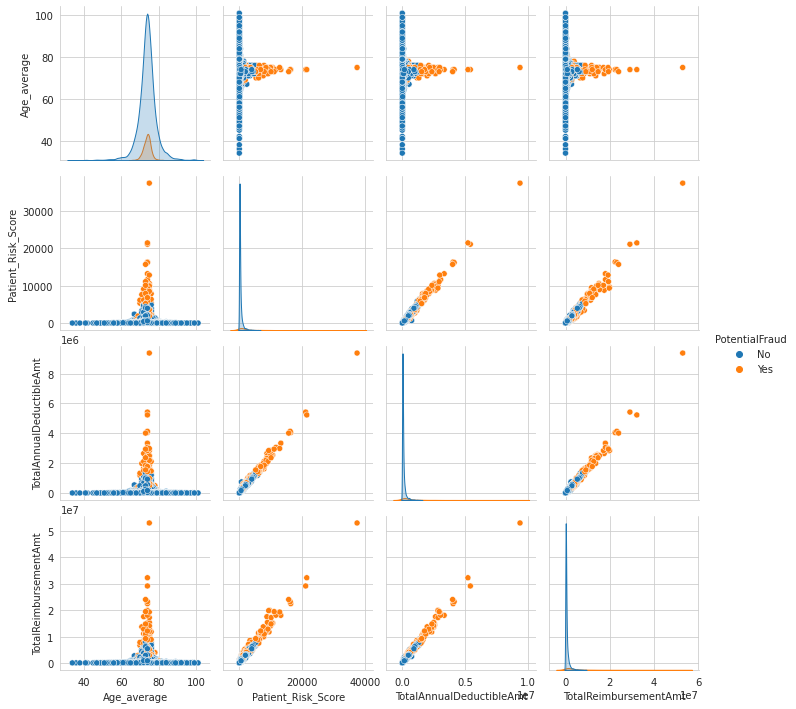

In [ ]:
cols1 = ['Age_average', 'Patient_Risk_Score', 'TotalAnnualDeductibleAmt', 'TotalReimbursementAmt', 'PotentialFraud']
df2 = df.loc[:,cols1]
sns.pairplot(df2, hue = 'PotentialFraud', diag_kind = 'kde') # diag_kind = 'kde': 대각 방향 밀도함수 지정
plt.show()

In [ ]:
cols = ['Age_average', 'Patient_Risk_Score', 'InscClaimAmtReimbursed', 'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'PotentialFraud']
df1 = df.loc[:, cols]
df1.columns

Index(['Age_average', 'Patient_Risk_Score', 'InscClaimAmtReimbursed',
       'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'PotentialFraud'],
      dtype='object')

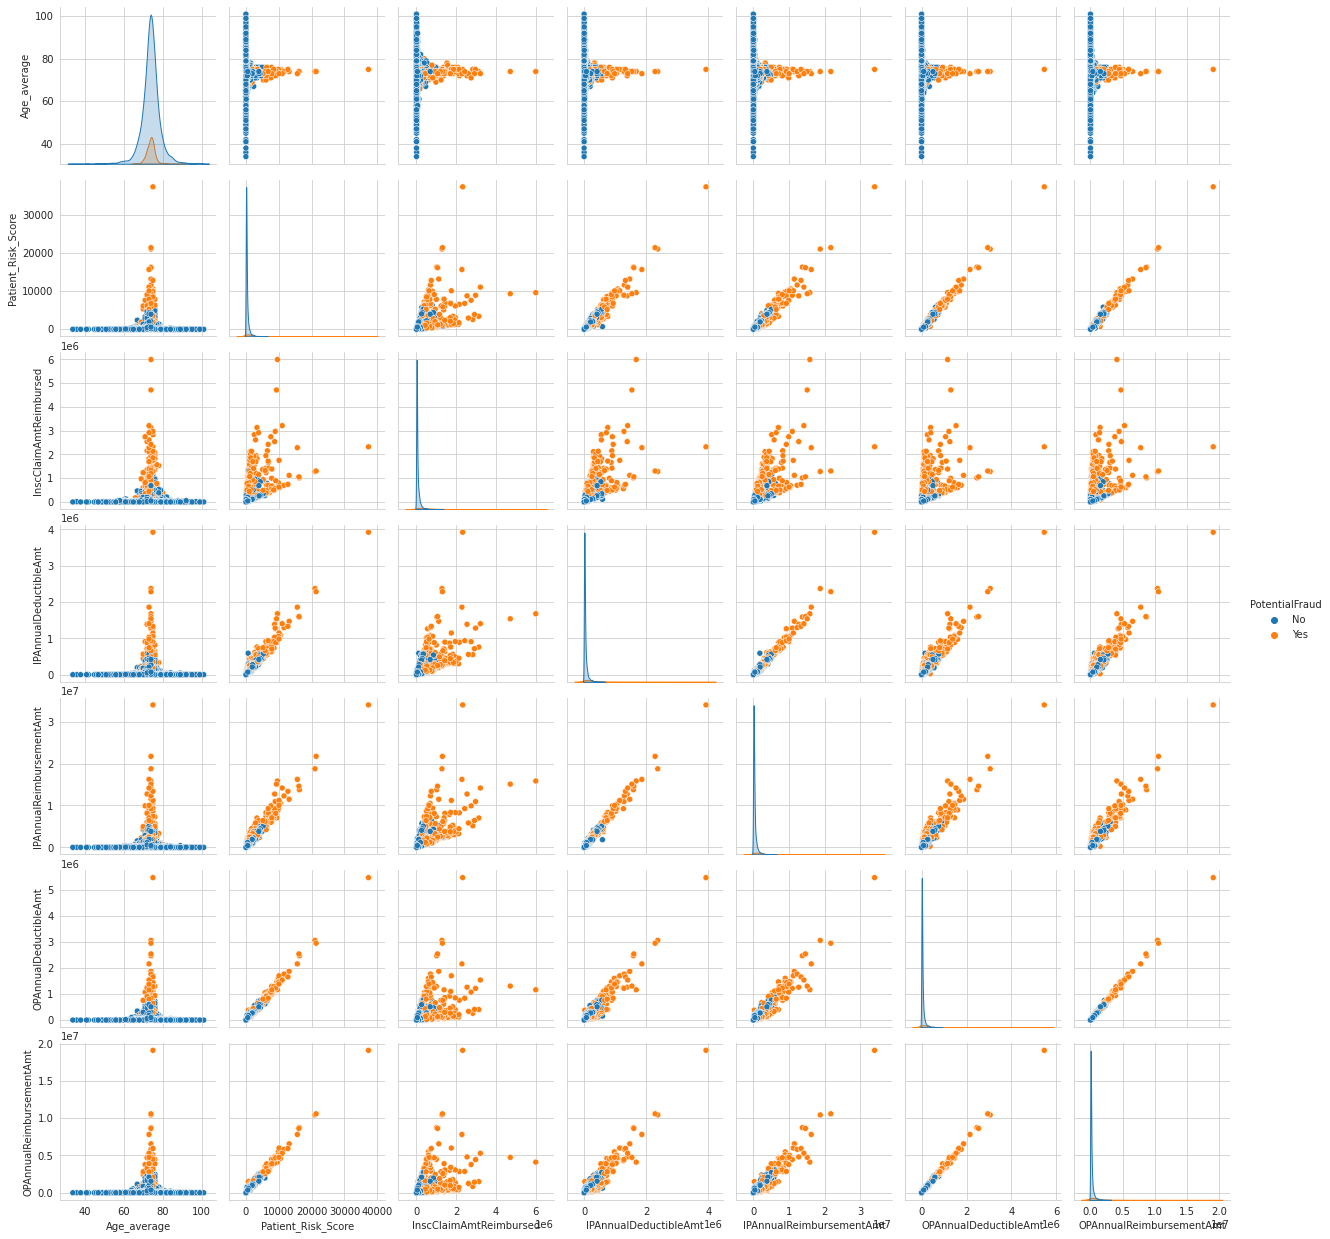

In [ ]:
sns.pairplot(df1, hue = 'PotentialFraud', diag_kind = 'kde') # diag_kind = 'kde': 대각 방향 밀도함수 지정
plt.show()

## !!!아님!!! 참고. regplot (피처-타겟 상관관계)

In [ ]:
# plot_cols = ['PotentialFraud', 'Age_average', 'Patient_Risk_Score', 'TotalAnnualDeductibleAmt', 'TotalReimbursementAmt', 'Duration_IP', 'Claim_Period']

#regplot으로 선형회귀선 표시
# plt.figure(figsize=(24,24))
# for idx, col in enumerate(plot_cols[1:]):
#   ax1 = plt.subplot(3, 2, idx+1)
#   sns.regplot(x = col, y = plot_cols[0], data = df, ax = ax1)
# plt.show()
# 참고. https://liz09045.tistory.com/95

## 클래스 별 데이터 분포 시각화

In [ ]:
df.PotentialFraud = df.PotentialFraud.replace({'Yes': 1, 'No': 0})
df.head()

,Unnamed: 0,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Duration_IP,Claim_Period,Claimed_extra,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,is_dead,TotalReimbursementAmt,TotalAnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_Duration_IP,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerProvider_count_ClaimID,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5,PerProvider_count_Claims,Age_average
0,0,PRV51001,0,104640,5340.0,30.0,30.0,0.0,5,8,300,300,15,440150,22428,65380,11598,147,0,505530,34026,104640.0,5340.0,440150.0,22428.0,65380.0,11598.0,1971.0,30.0,30.0,147.0,625,9.0,16.0,21.0,4.0,0.0,0.0,25,79.0
1,1,PRV51003,1,605670,66286.0,382.0,382.0,0.0,62,29,1560,1567,56,999000,122948,353520,97300,629,1,1352520,220248,605670.0,66286.0,999000.0,122948.0,353520.0,97300.0,9243.0,382.0,382.0,629.0,17424,54.0,78.0,107.0,24.0,0.0,1.0,132,70.0
2,2,PRV51004,0,52170,310.0,0.0,0.0,0.0,0,23,1768,1782,64,648430,64808,327040,92790,670,1,975470,157598,52170.0,310.0,648430.0,64808.0,327040.0,92790.0,10752.0,0.0,0.0,670.0,22201,46.0,103.0,120.0,24.0,5.0,0.0,149,72.0
3,3,PRV51005,1,280910,3700.0,0.0,0.0,0.0,0,259,13872,13910,426,4221950,441724,2457840,741323,5310,4,6679790,1183047,280910.0,3700.0,4221950.0,441724.0,2457840.0,741323.0,82104.0,0.0,0.0,5310.0,1357225,511.0,654.0,893.0,262.0,10.0,0.0,1165,70.0
4,4,PRV51007,0,33710,3264.0,19.0,19.0,0.0,3,11,852,852,26,219600,32040,124540,33820,311,1,344140,65860,33710.0,3264.0,219600.0,32040.0,124540.0,33820.0,4989.0,19.0,19.0,311.0,5184,34.0,38.0,58.0,14.0,0.0,0.0,72,69.0


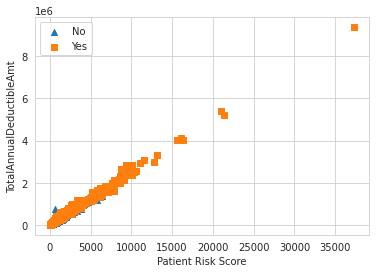

In [ ]:
markers=['^', 's'] # 'o': 원
labels=['No', 'Yes']

for i, marker in enumerate(markers):
    x_axis_data = df[df['PotentialFraud']==i]['Patient_Risk_Score']
    y_axis_data = df[df['PotentialFraud']==i]['TotalAnnualDeductibleAmt']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=labels[i])

plt.legend()
plt.xlabel('Patient Risk Score')
plt.ylabel('TotalAnnualDeductibleAmt')
plt.show()

# 참고. https://huidea.tistory.com/44

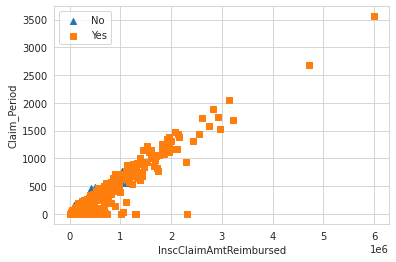

In [ ]:
markers=['^', 's'] # 'o': 원
labels=['No', 'Yes']

for i, marker in enumerate(markers):
    x_axis_data = df[df['PotentialFraud']==i]['InscClaimAmtReimbursed']
    y_axis_data = df[df['PotentialFraud']==i]['Claim_Period']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=labels[i])

plt.legend()
plt.xlabel('InscClaimAmtReimbursed')
plt.ylabel('Claim_Period')
plt.show()

# 참고. https://huidea.tistory.com/44

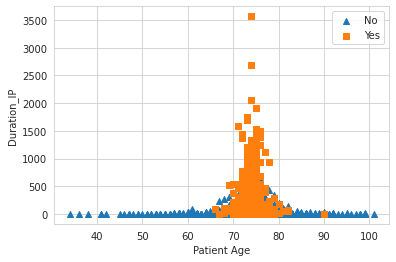

In [ ]:
markers=['^', 's'] # 'o': 원
labels=['No', 'Yes']

for i, marker in enumerate(markers):
    x_axis_data = df[df['PotentialFraud']==i]['Age_average']
    y_axis_data = df[df['PotentialFraud']==i]['Duration_IP']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=labels[i])

plt.legend()
plt.xlabel('Patient Age')
plt.ylabel('Duration_IP')
plt.show()

# 참고. https://huidea.tistory.com/44

In [ ]:
df.columns

Index(['Unnamed: 0', 'Provider', 'PotentialFraud', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'Duration_IP', 'Claim_Period', 'Claimed_extra',
       'Inpatient_or_Outpatient', 'RenalDiseaseIndicator',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
       'Patient_Risk_Score', 'is_dead', 'TotalReimbursementAmt',
       'TotalAnnualDeductibleAmt', 'PerProvider_mean_InscClaimAmtReimbursed',
       'PerProvider_mean_DeductibleAmtPaid',
       'PerProvider_mean_IPAnnualReimbursementAmt',
       'PerProvider_mean_IPAnnualDeductibleAmt',
       'PerProvider_mean_OPAnnualReimbursementAmt',
       'PerProvider_mean_OPAnnualDeductibleAmt',
       'PerProvider_mean_Patient_Age', 'PerProvider_mean_Duration_IP',
       'PerProvider_mean_Claim_Period', 'PerProvider_mean_Patient_Risk_Score',
       'PerProvider_count_ClaimID', 'Gender_1', 'G

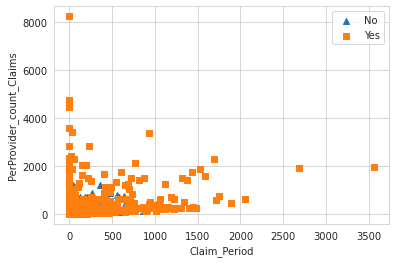

In [ ]:
markers=['^', 's'] # 'o': 원
labels=['No', 'Yes']

for i, marker in enumerate(markers):
    x_axis_data = df[df['PotentialFraud']==i]['Claim_Period']
    y_axis_data = df[df['PotentialFraud']==i]['PerProvider_count_Claims']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=labels[i])

plt.legend()
plt.xlabel('Claim_Period')
plt.ylabel('PerProvider_count_Claims')
plt.show()

# 참고. https://huidea.tistory.com/44

## Gender, Race 칼럼 인코딩<br>
1) 데이터타입 변경 (both int64 > categorical)<br>
2) 원핫인코딩

In [ ]:
# X_train.Gender.unique: array([0, 1], dtype=int64)
# X_train.Race.unique: array([1, 2, 5, 3], dtype=int64)
X_train_dropped.Race = X_train_dropped.Race.astype('category')
X_train_dropped.Gender = X_train_dropped.Gender.astype('category')

In [ ]:
# !pip install category_encoders
# from category_encoders import OneHotEncoder
# pandas get_dummies
X_train_dropped = pd.get_dummies(X_train_dropped, columns = ['Gender', 'Race'])

In [ ]:
X_train_dropped.shape

(558211, 39)

In [ ]:
X_train_dropped.head(2)

# cols_asis = ['']
# cols_tobe = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Duration_IP', 'Claim_Period', 'Claimed_extra', ]

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,DiagnosisGroupCode,Duration_IP,Claim_Period,Claimed_extra,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,is_dead,PotentialFraud,TotalReimbursementAmt,TotalAnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_Duration_IP,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerProvider_count_ClaimID,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,PRV55912,26000,1068.0,201,7.0,7.0,0.0,1,0,12,12,1,36000,3204,60,70,7,67.0,0,Yes,36060,3274,7010.093458,599.158879,13279.626168,1391.663551,2329.626168,557.850467,76.093458,4.186916,4.186916,5.514019,107,1,0,1,0,0,0
1,PRV55912,50,0.0,0,0.0,0.0,0.0,0,0,12,12,1,24000,2136,450,200,4,78.0,0,Yes,24450,2336,7010.093458,599.158879,13279.626168,1391.663551,2329.626168,557.850467,76.093458,4.186916,4.186916,5.514019,107,1,0,1,0,0,0


In [ ]:
X_train_dropped_grouped_p = X_train_dropped.groupby(['Provider', 'PotentialFraud'], as_index = False).agg('sum')

In [ ]:
X_train_dropped_grouped_p.head(2)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Duration_IP,Claim_Period,Claimed_extra,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,is_dead,TotalReimbursementAmt,TotalAnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_Duration_IP,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerProvider_count_ClaimID,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,PRV51001,No,104640,5340.0,30.0,30.0,0.0,5,8,300,300,15,440150,22428,65380,11598,147,1971.0,0,505530,34026,104640.0,5340.0,440150.0,22428.0,65380.0,11598.0,1971.0,30.0,30.0,147.0,625,9.0,16.0,21.0,4.0,0.0,0.0
1,PRV51003,Yes,605670,66286.0,382.0,382.0,0.0,62,29,1560,1567,56,999000,122948,353520,97300,629,9243.0,1,1352520,220248,605670.0,66286.0,999000.0,122948.0,353520.0,97300.0,9243.0,382.0,382.0,629.0,17424,54.0,78.0,107.0,24.0,0.0,1.0


In [ ]:
claim_per_provider = X_train.groupby('Provider', as_index = False).ClaimID.count().iloc[:,1]
claim_per_provider

0         25
1        132
2        149
3       1165
4         72
        ... 
5405      28
5406      22
5407      82
5408       1
5409     118
Name: ClaimID, Length: 5410, dtype: int64

In [ ]:
# Provider별 청구 건수
# claim_per_provider = X_train_dropped.groupby('Provider', as_index = False).InscClaimAmtReimbursed.count().iloc[:,1]
X_train_dropped_grouped_p['PerProvider_count_Claims'] = claim_per_provider
X_train_dropped_grouped_p['PerProvider_count_Claims']

0         25
1        132
2        149
3       1165
4         72
        ... 
5405      28
5406      22
5407      82
5408       1
5409     118
Name: PerProvider_count_Claims, Length: 5410, dtype: int64

In [ ]:
X_train_dropped_grouped_p.head(2)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Duration_IP,Claim_Period,Claimed_extra,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,is_dead,TotalReimbursementAmt,TotalAnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_Duration_IP,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerProvider_count_ClaimID,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5,PerProvider_count_Claims
0,PRV51001,No,104640,5340.0,30.0,30.0,0.0,5,8,300,300,15,440150,22428,65380,11598,147,1971.0,0,505530,34026,104640.0,5340.0,440150.0,22428.0,65380.0,11598.0,1971.0,30.0,30.0,147.0,625,9.0,16.0,21.0,4.0,0.0,0.0,25
1,PRV51003,Yes,605670,66286.0,382.0,382.0,0.0,62,29,1560,1567,56,999000,122948,353520,97300,629,9243.0,1,1352520,220248,605670.0,66286.0,999000.0,122948.0,353520.0,97300.0,9243.0,382.0,382.0,629.0,17424,54.0,78.0,107.0,24.0,0.0,1.0,132


In [ ]:
X_train_dropped_grouped_p.shape

(5410, 39)

In [ ]:
X_train_dropped_grouped_p[X_train_dropped_grouped_p.Claimed_extra != 0]['Claimed_extra'].count()

47

In [ ]:
X_train_dropped_grouped_p[X_train_dropped_grouped_p.Claimed_extra > 0]['Claimed_extra'].count() # 실제 진료시간보다 많이 청구된 사례 15건

15

In [ ]:
X_train_dropped_grouped_p[X_train_dropped_grouped_p.Claimed_extra < 0]['Claimed_extra'].count() # 실제 진료시간보다 많이 청구된 사례 32건

32

In [ ]:
X_train_dropped_grouped_p.shape # (5410, 255) > (5410, 39)

(5410, 39)

In [ ]:
X_train_dropped_grouped_p['Age_average'] = round((X_train_dropped_grouped_p.Patient_Age / X_train_dropped_grouped_p.PerProvider_count_Claims), 0)
X_train_dropped_grouped_p = X_train_dropped_grouped_p.drop(columns = ['Patient_Age'], axis = 1)

In [ ]:
X_train_dropped_grouped_p.head(2)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Duration_IP,Claim_Period,Claimed_extra,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,is_dead,TotalReimbursementAmt,TotalAnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_Duration_IP,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerProvider_count_ClaimID,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5,PerProvider_count_Claims,Age_average
0,PRV51001,No,104640,5340.0,30.0,30.0,0.0,5,8,300,300,15,440150,22428,65380,11598,147,0,505530,34026,104640.0,5340.0,440150.0,22428.0,65380.0,11598.0,1971.0,30.0,30.0,147.0,625,9.0,16.0,21.0,4.0,0.0,0.0,25,79.0
1,PRV51003,Yes,605670,66286.0,382.0,382.0,0.0,62,29,1560,1567,56,999000,122948,353520,97300,629,1,1352520,220248,605670.0,66286.0,999000.0,122948.0,353520.0,97300.0,9243.0,382.0,382.0,629.0,17424,54.0,78.0,107.0,24.0,0.0,1.0,132,70.0


# 최종 train 데이터 저장

In [ ]:
X_train_dropped_grouped_p.to_csv('train1.csv')

# 감사합니다! (Colab 1/2)